In [1]:
%pip install sklearn
%pip install librosa
%pip install xgboost
# importing libraries

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore") 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
# dataset dir
datasetPath = "./dataset/audio_speech_actors_01-24"

In [3]:
dirList = os.listdir(datasetPath)

emotions = []
paths = []

for dirName in dirList:
    if dirName == ".DS_Store":
        continue
    fname = os.listdir(os.path.join(datasetPath, dirName))
    for f in fname:
        part = f.split('.')[0].split('-')
        emotions.append(int(part[2]))
        paths.append(os.path.join(datasetPath, dirName, f))

In [4]:
# creating dataframes
dataframe = pd.DataFrame(emotions, columns=['Emotions'])
dataframe = dataframe.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
dataframe['Path'] = paths

dataframe.head()

,Emotions,Path
0,angry,./dataset/audio_speech_actors_01-24/Actor_16/0...
1,fear,./dataset/audio_speech_actors_01-24/Actor_16/0...
2,fear,./dataset/audio_speech_actors_01-24/Actor_16/0...
3,angry,./dataset/audio_speech_actors_01-24/Actor_16/0...
4,disgust,./dataset/audio_speech_actors_01-24/Actor_16/0...


In [5]:
# shape of the dataset
dataframe.shape

(1440, 2)

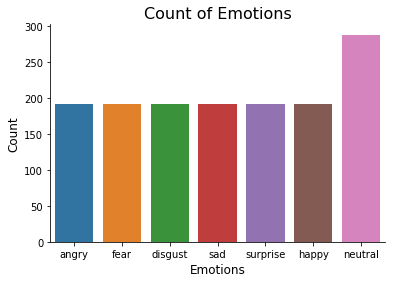

In [6]:
# Data Visualisation
plt.title('Count of Emotions', size=16)
sns.countplot(dataframe.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [7]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [8]:
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

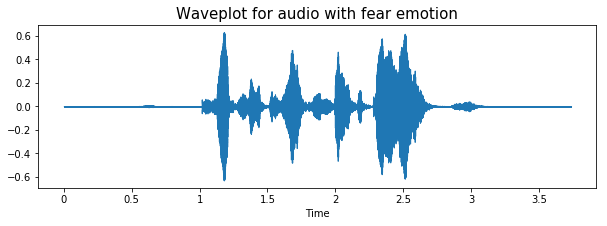

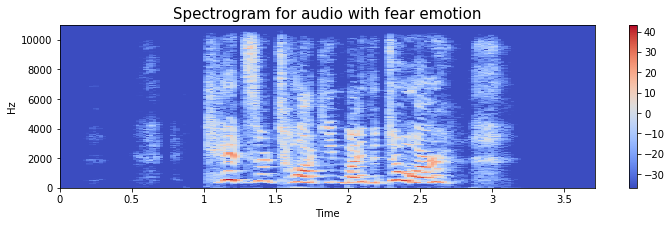

In [9]:
emotion = 'fear'
path = np.array(dataframe.Path[dataframe.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

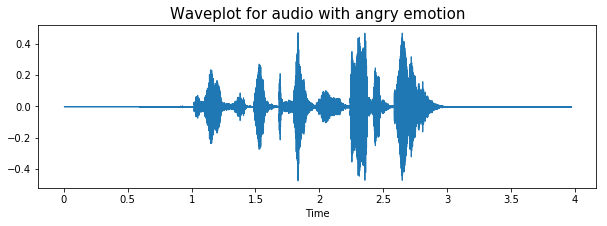

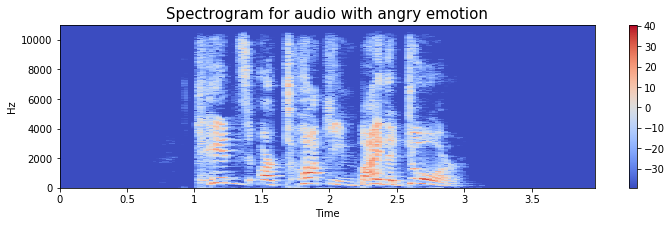

In [10]:
emotion = 'angry'
path = np.array(dataframe.Path[dataframe.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

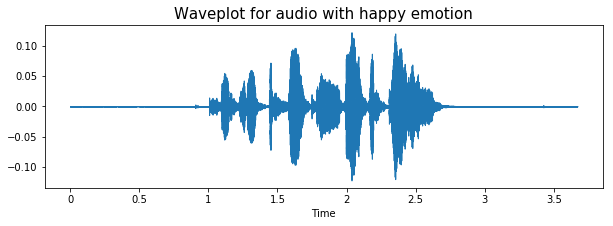

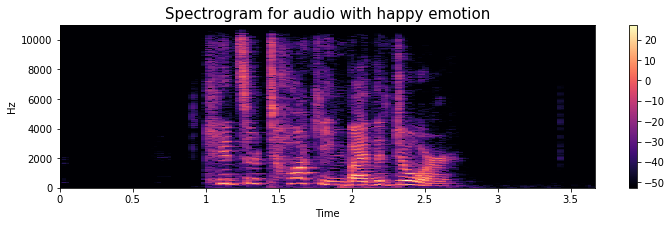

In [11]:
emotion = 'happy'
path = np.array(dataframe.Path[dataframe.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

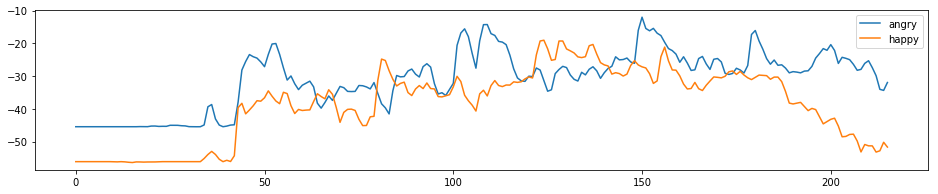

In [12]:
# Emotion - angry
path = np.array(dataframe.Path[dataframe.Emotions == 'angry'])[1]
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
angry = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
angry = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

# Emotion - happy
path = np.array(dataframe.Path[dataframe.Emotions == 'happy'])[1]
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
happy = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
happy = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(angry, label='angry')
plt.plot(happy, label='happy')
plt.legend()
plt.show()

In [13]:
# Data Augmentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [14]:
# adding noise, pitch
path = np.array(dataframe.Path)[1]
data, sample_rate = librosa.load(path)

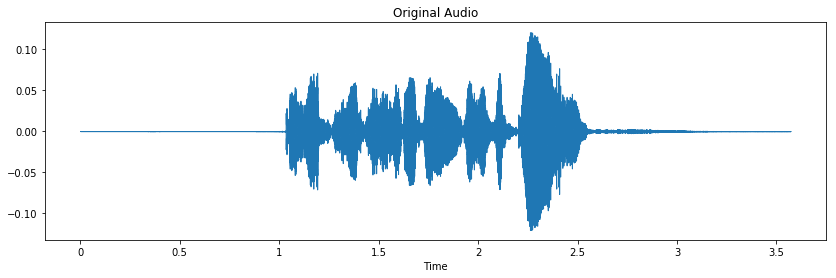

In [15]:
# original Audio
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title("Original Audio")
Audio(path)

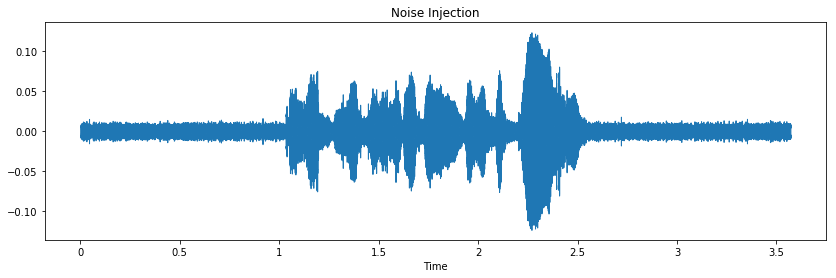

In [16]:
# Noise Injection
x = noise(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Noise Injection")
Audio(x, rate=sample_rate)

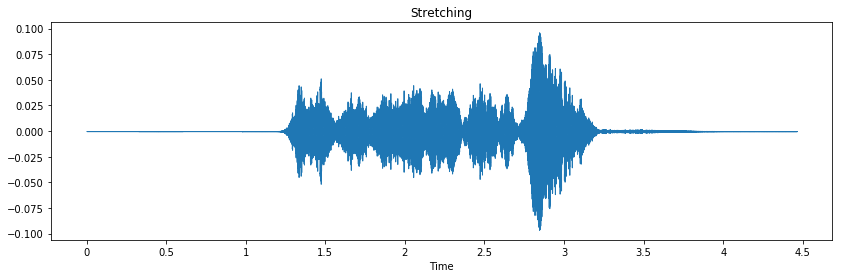

In [17]:
# Stretching
x = stretch(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Stretching")
Audio(x, rate=sample_rate)

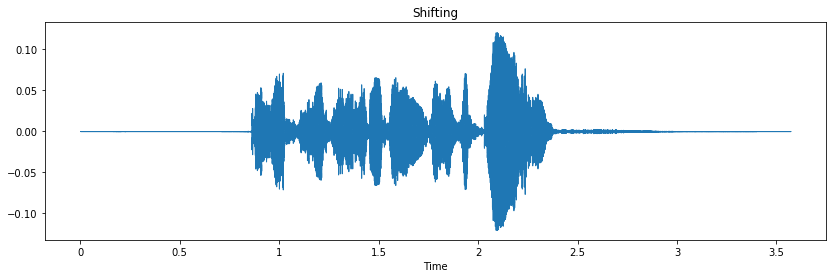

In [18]:
# Shifting
x = shift(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Shifting")
Audio(x, rate=sample_rate)

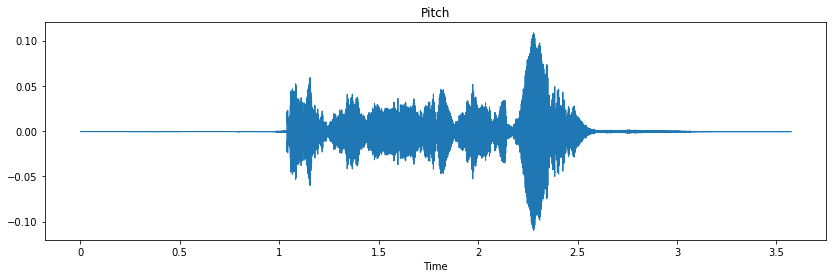

In [19]:
# Pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Pitch")
Audio(x, rate=sample_rate)

In [20]:
# Feature Extraction
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  
    return result

In [21]:
def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array(extract_features(data))

    noise_data = noise(data)
    result = np.vstack((result, extract_features(noise_data)))

    data_stretch_pitch = pitch(stretch(data), sample_rate)
    result = np.vstack((result, extract_features(data_stretch_pitch)))

    return result

In [22]:
# Extracting and processing features from dataset
X, Y = [], []
for path, emotion in zip(dataframe.Path, dataframe.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [23]:
len(X), len(Y), dataframe.Path.shape

(4320, 4320, (1440,))

In [24]:
# encoding labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [25]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3, shuffle=True)
len(x_train), len(y_train), len(x_test), len(y_test)

(3024, 3024, 1296, 1296)

In [26]:
# scaling features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3024, 162), (3024, 7), (1296, 162), (1296, 7))

In [27]:
y_train = encoder.inverse_transform(y_train)
y_test = encoder.inverse_transform(y_test)

In [28]:
print("Total number of training sample: ",x_train.shape[0])
print("Total number of testing example: ",x_test.shape[0])
print("Feature extracted",x_train.shape[1])

Total number of training sample:  3024
Total number of testing example:  1296
Feature extracted 162


In [29]:
def modelProcess(trainX, testX, trainY, testY, model, name):
    print("processing {} model".format(name))
    print("Training the model")
    model.fit(trainX, trainY)
    print("Evaluating the model")
    predY = model.predict(testX)
    accuracy = accuracy_score(y_true=testY, y_pred=predY)
    accuracy *= 100
    print("Accuracy of : {:.2f}%".format(accuracy, name))
    print("-----" * 8)
    print()
    return accuracy, predY

In [30]:
# defining model
logistic = LogisticRegression()
svm = SVC()
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()

In [31]:
# modeling process for Logistic Regression
logisticAcc, y_predLogistic = modelProcess(x_train, x_test, y_train, y_test, logistic, "Logistic Regression")

# modeling process for SVM
svmAcc, y_predSVM = modelProcess(x_train, x_test, y_train, y_test, svm, "SVM")

# modeling process for adaboost
adaboostAcc, y_predAdaboost = modelProcess(x_train, x_test, y_train, y_test, adaboost, "Adaboost")

# modeling process for XG Boosting
xgboostAcc, y_predXgboost = modelProcess(x_train, x_test, y_train, y_test, xgboost, "XG Boosting")


processing Logistic Regression model
Training the model
Evaluating the model
Accuracy of : 56.48%
----------------------------------------

processing SVM model
Training the model
Evaluating the model
Accuracy of : 57.56%
----------------------------------------

processing Adaboost model
Training the model
Evaluating the model
Accuracy of : 35.73%
----------------------------------------

processing XG Boosting model
Training the model
[16:15:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Evaluating the model
Accuracy of : 74.85%
----------------------------------------



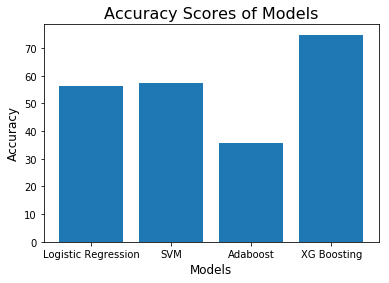

In [32]:
# visualising results
plt.title('Accuracy Scores of Models', size=16)
scores = [logisticAcc, svmAcc, adaboostAcc, xgboostAcc]
modelNames = ['Logistic Regression', 'SVM', 'Adaboost', 'XG Boosting']
plt.bar(modelNames, scores)
plt.ylabel('Accuracy', size=12)
plt.xlabel('Models', size=12)
plt.show()

In [33]:
print("The {} model is performing better than other models with score {:.2f}".format(modelNames[np.argmax(scores)], max(scores)))

The XG Boosting model is performing better than other models with score 74.85


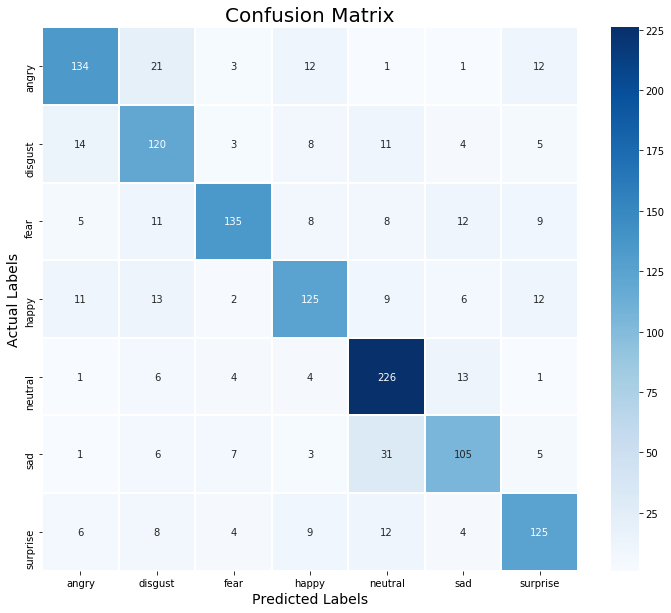

In [34]:
cm = confusion_matrix(y_test, y_predXgboost)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [35]:
print("Classification Report")
print(classification_report(y_test, y_predXgboost))


Classification Report
              precision    recall  f1-score   support

       angry       0.78      0.73      0.75       184
     disgust       0.65      0.73      0.69       165
        fear       0.85      0.72      0.78       188
       happy       0.74      0.70      0.72       178
     neutral       0.76      0.89      0.82       255
         sad       0.72      0.66      0.69       158
    surprise       0.74      0.74      0.74       168

    accuracy                           0.75      1296
   macro avg       0.75      0.74      0.74      1296
weighted avg       0.75      0.75      0.75      1296



In [36]:
# saving model
import pickle
xgboost.fit(x_train, y_train)
pickle.dump(xgboost, open("xgboostModel.pkl",'wb'))

[16:15:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
# Live Demo
data, sampling_rate = librosa.load("./dataset/Actor_01/03-01-02-02-02-01-01.wav")

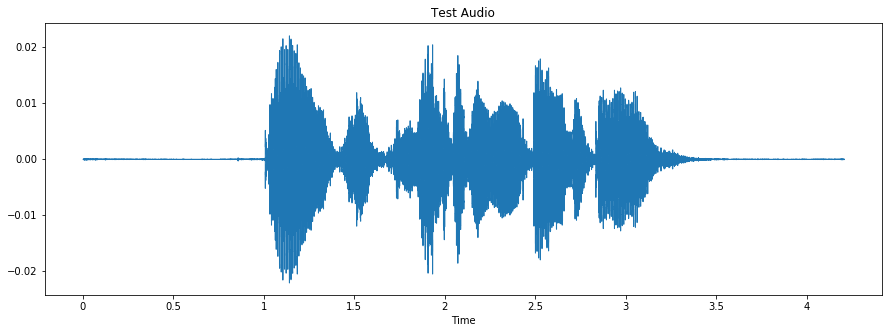

In [38]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title("Test Audio")
Audio(data, rate=sample_rate)

In [39]:
# loading model
model = pickle.load(open("xgboostModel.pkl",'rb'))

In [40]:
# loading and predicting
feature = get_features("./dataset/Actor_01/03-01-02-02-02-01-01.wav")
predictedResult = model.predict(scaler.transform(feature))[0]
predictedScore = model.predict_proba(scaler.transform(feature))[0]

In [41]:
print("Predicted emotion is '{}' with score {:.2f}%".format(predictedResult, max(predictedScore)*100 ))

Predicted emotion is 'neutral' with score 99.41%
